In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Position_Salaries.csv')

In [25]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [28]:
X = sc_X.fit_transform(X)
y = np.squeeze(sc_Y.fit_transform(y.reshape(-1,1)))

In [29]:
# Fitting SVR to the dataset
from sklearn.svm import SVR

In [30]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

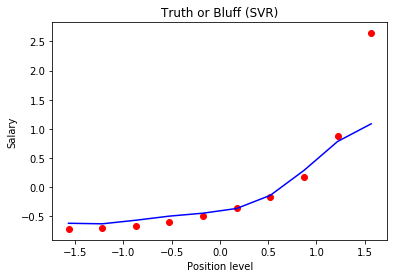

In [37]:
#Visualising the SVR results
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

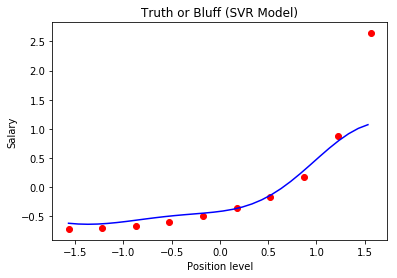

In [38]:
#Visulising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid)),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()